In [ ]:
import os
import kagglehub

data_path = kagglehub.dataset_download('sahilchambyal/solana-price-usd')

# List the files inside the downloaded data directory
for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

100%|██████████| 288M/288M [00:04<00:00, 65.4MB/s]

Extracting files...


/root/.cache/kagglehub/datasets/sahilchambyal/solana-price-usd/versions/2/SOL_2022_2024_30m.csv
/root/.cache/kagglehub/datasets/sahilchambyal/solana-price-usd/versions/2/SOL_2020_2024_6H.csv
/root/.cache/kagglehub/datasets/sahilchambyal/solana-price-usd/versions/2/SOLUSD_1min_20AUG2020_to15NOV2024.csv
/root/.cache/kagglehub/datasets/sahilchambyal/solana-price-usd/versions/2/SOL_2022_2024_5m.csv
/root/.cache/kagglehub/datasets/sahilchambyal/solana-price-usd/versions/2/SOL_2020_2024_8H.csv
/root/.cache/kagglehub/datasets/sahilchambyal/solana-price-usd/versions/2/SOL_2020_2024_2H.csv
/root/.cache/kagglehub/datasets/sahilchambyal/solana-price-usd/versions/2/SOL_2022_2024_3m.csv
/root/.cache/kagglehub/datasets/sahilchambyal/solana-price-usd/versions/2/SOL_2022_2024_15m.csv
/root/.cache/kagglehub/datasets/sahilchambyal/solana-price-usd/versions/2/SOLUSD_1s_05NOV2024_to15NOV2024.csv
/root/.cache/kagglehub/datasets/sahilchambyal/solana-price-usd/versions/2/SOLUSD_1s_01NOV2024_to15NOV2024.csv
/

In [ ]:
import pandas as pd
df = pd.read_csv(data_path + '/SOL_2022_2024_3m.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751000 entries, 0 to 750999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OpenTime             751000 non-null  int64  
 1   Open                 751000 non-null  float64
 2   High                 751000 non-null  float64
 3   Low                  751000 non-null  float64
 4   Close                751000 non-null  float64
 5   Volume               751000 non-null  float64
 6   CloseTime            751000 non-null  int64  
 7   QuoteAssetVolume     751000 non-null  float64
 8   NumberOfTrades       751000 non-null  int64  
 9   TakerBuyBaseVolume   751000 non-null  float64
 10  TakerBuyQuoteVolume  751000 non-null  float64
 11  Ignore               751000 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 68.8 MB


In [ ]:
df.tail(10)

,OpenTime,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberOfTrades,TakerBuyBaseVolume,TakerBuyQuoteVolume,Ignore
750990,1732897980000,243.57,243.70,242.20,242.45,14883.795,1732898159999,3.615510e+06,7653,5206.844,1.265771e+06,0
750991,1732898160000,242.45,242.71,242.10,242.49,7876.074,1732898339999,1.909204e+06,6884,4205.284,1.019470e+06,0
750992,1732898340000,242.49,243.05,242.45,242.58,8914.684,1732898519999,2.163693e+06,5682,4843.722,1.175704e+06,0
750993,1732898520000,242.58,242.65,242.24,242.59,6229.014,1732898699999,1.510289e+06,3988,2377.362,5.764486e+05,0
750994,1732898700000,242.59,242.84,242.55,242.71,5748.204,1732898879999,1.395061e+06,5574,2635.518,6.396341e+05,0
750995,1732898880000,242.71,243.05,242.42,242.78,7133.511,1732899059999,1.732033e+06,6413,3675.244,8.923938e+05,0
750996,1732899060000,242.79,242.91,242.44,242.58,7466.595,1732899239999,1.811112e+06,4369,2621.359,6.358547e+05,0
750997,1732899240000,242.58,242.72,242.00,242.19,10798.322,1732899419999,2.616085e+06,5221,3646.120,8.833995e+05,0
750998,1732899420000,242.19,242.34,241.92,241.94,5992.496,1732899599999,1.450849e+06,3204,2003.626,4.852325e+05,0
750999,1732899600000,241.94,242.24,241.92,242.03,6913.314,1732899779999,1.673791e+06,5500,3883.350,9.402054e+05,0


In [ ]:
feature = df[['Open', 'High']]

In [ ]:
Open = df['Open'].values
High = df['High'].values
Low = df['Low'].values

In [ ]:
import numpy as np

Open_new = [1.00]
for i in range(1,  len(Open)):
  Open_new.append(((Open[i] - Open[i-1]) / Open[i-1]) + 1)
Open_new = np.array(Open_new)

High_new = [1.00]
for i in range(1,  len(High)):
  High_new.append(((High[i] - High[i-1]) / High[i-1]) + 1)
High_new = np.array(High_new)

Low_new = [1.00]
for i in range(1,  len(Low)):
  Low_new.append(((Low[i] - Low[i-1]) / Low[i-1]) + 1)
Low_new = np.array(Low_new)


In [ ]:
print(len(Open_new))

751000


In [ ]:
for i in range(10):
  print(Open_new[i], High_new[i], Low_new[i])


1.0 1.0 1.0
1.0 1.0 0.9973809134064495
1.0010476346374202 1.0 1.003577876251436
0.9999018870392778 0.9999018870392778 0.9963694642506705
0.9994112644730818 1.0000981225878198 0.9987197583954306
0.9981672993847361 1.0013081728096282 1.002498027872732
0.9983278688524592 0.994512852336937 0.9983278688524592
1.0 1.0 0.9955991986600544
0.9955991986600544 0.9955991986600544 0.9929078014184397
0.9959755896420914 0.9959755896420914 1.0002990033222592


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751000 entries, 0 to 750999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OpenTime             751000 non-null  int64  
 1   Open                 751000 non-null  float64
 2   High                 751000 non-null  float64
 3   Low                  751000 non-null  float64
 4   Close                751000 non-null  float64
 5   Volume               751000 non-null  float64
 6   CloseTime            751000 non-null  int64  
 7   QuoteAssetVolume     751000 non-null  float64
 8   NumberOfTrades       751000 non-null  int64  
 9   TakerBuyBaseVolume   751000 non-null  float64
 10  TakerBuyQuoteVolume  751000 non-null  float64
 11  Ignore               751000 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 68.8 MB


In [ ]:
# target =

In [ ]:
# features = df[['Volume', 'QuoteAssetVolume', 'NumberOfTrades', 'TakerBuyBaseVolume', 'TakerBuyQuoteVolume']].values
# for i in range(5):
#   print(features[i])
# print()
# features = np.column_stack((features, Open_new))
# features = np.column_stack((features, High_new))
# features = np.column_stack((features, Low_new))
# for i in range(5):
#   print(features[i])

In [ ]:
def min_next_elements(x, y, z):
  target = []
  for i in range(len(x)-1):
    prod = x[i]
    for j in range(i+1, min(i+z+1, len(x))):
      prod *= x[j]
      if prod >= y:
        target.append(j-i)
        break
    target.append(-1)
  return target



In [ ]:
target = min_next_elements(Open_new, 1.01, 480)

In [ ]:
for i in range(50):
  print(target[i])

126
-1
125
-1
124
-1
123
-1
122
-1
121
-1
120
-1
119
-1
118
-1
30
-1
25
-1
24
-1
23
-1
22
-1
21
-1
24
-1
23
-1
109
-1
21
-1
20
-1
15
-1
18
-1
17
-1
16
-1
11
-1


In [ ]:
for i in range(10):
  print(Open_new[i])

1.0
1.0
1.0010476346374202
0.9999018870392778
0.9994112644730818
0.9981672993847361
0.9983278688524592
1.0
0.9955991986600544
0.9959755896420914


In [ ]:
for i in range(10):
  print(target[(i)])

126
-1
125
-1
124
-1
123
-1
122
-1


In [ ]:
filt = [ele for ele in target if ele != None]
print(f'min: {min(filt)}, max: {max(filt)}')

min: -1, max: 480


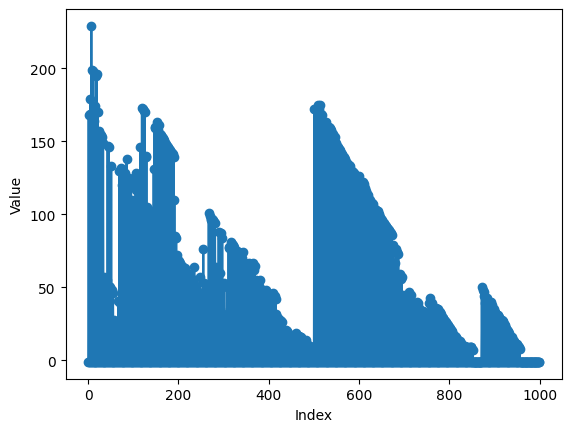

In [ ]:
import matplotlib.pyplot as plt

# Suppose we have an array of values
# values = [10, 20, 15, 30, 25]
# values = target[-1020:-1000]
values = target[-1000:]

# The x-axis will be the array indices (0, 1, 2, 3, ...)
x = range(len(values))

# Plot the values against their indices
plt.plot(x, values, marker='o', linestyle='-')

# Optionally label axes
plt.xlabel('Index')
plt.ylabel('Value')

# Display the plot
plt.show()


In [ ]:
# import plotly.graph_objects as go

# # values = [10, 20, 15, 30, 25]
# values = target

# # Create a trace with indices as x and values as y
# fig = go.Figure(data=go.Scatter(x=list(range(len(values))), y=values, mode='lines+markers'))

# fig.update_layout(
#     xaxis_title='Index',
#     yaxis_title='Value'
# )

# fig.show()
# fig.write_html('plot4.html')
